In [1]:
# program to predict the find the average price and region of avocados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# read csv file
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.columns = df.columns.str.replace(' ','_')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# check size of dataset
df.shape

(907, 27)

In [3]:
# show all columns at once to observe data properly
pd.set_option('max_columns', None)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# deleting all columns which are insignificant to making prediction model
df = df.drop(['country','country_long','name','gppd_idnr','owner','source','url','geolocation_source','generation_data_source'], axis=1)
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,NaN
903,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


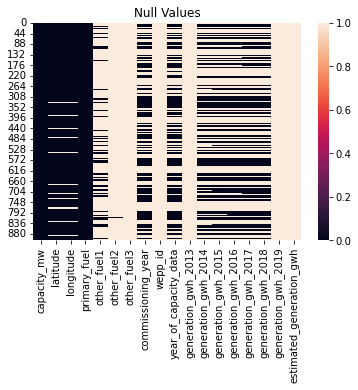

In [6]:
# check for any null values
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [7]:
# summing up total null values in dataset
df.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
estimated_generation_gwh    907
dtype: int64

In [8]:
# since other_fuel2, other_fuel3, wepp_id, gwh_2013, gwh_2019 and estimated_generation_gwh columns are completely null, we can remove them
df = df.drop(['other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh'], axis=1)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,2019.0,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# check null values again
df.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [10]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051309,0.197129,0.304087,NaN,0.839094,0.844352,0.870620,0.886673,0.901918
latitude,0.051309,1.000000,0.036362,0.129902,NaN,0.060330,0.048610,0.041387,0.040568,0.040476
longitude,0.197129,0.036362,1.000000,0.121910,NaN,0.013511,0.022760,0.050732,0.048678,0.045599
commissioning_year,0.304087,0.129902,0.121910,1.000000,NaN,0.160014,0.170363,0.193743,0.191367,0.193694
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.839094,0.060330,0.013511,0.160014,NaN,1.000000,0.961098,0.937060,0.912561,0.902781
generation_gwh_2015,0.844352,0.048610,0.022760,0.170363,NaN,0.961098,1.000000,0.974918,0.940191,0.934371
generation_gwh_2016,0.870620,0.041387,0.050732,0.193743,NaN,0.937060,0.974918,1.000000,0.972024,0.962073
generation_gwh_2017,0.886673,0.040568,0.048678,0.191367,NaN,0.912561,0.940191,0.972024,1.000000,0.985856
generation_gwh_2018,0.901918,0.040476,0.045599,0.193694,NaN,0.902781,0.934371,0.962073,0.985856,1.000000


<AxesSubplot:>

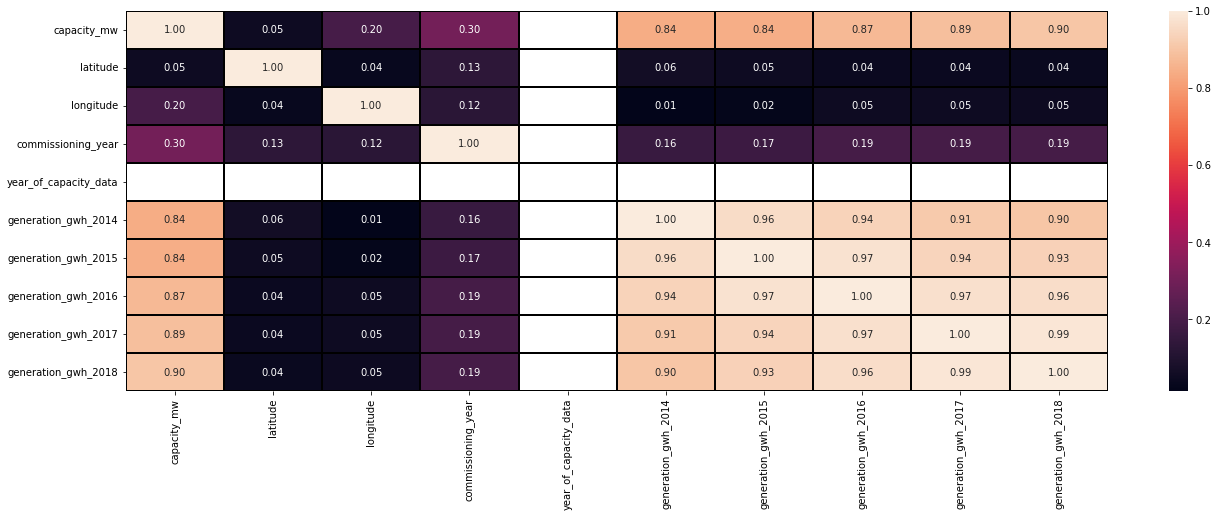

In [11]:
# checking corelation
corr_mat = df.corr()
plt.figure(figsize=(22,7))
sns.heatmap(corr_mat,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [12]:
# deleting columns based on results from corelation matrix 
df = df.drop(['generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'year_of_capacity_data'], axis=1)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year
0,2.5,28.1839,73.2407,Solar,2011.0
1,98.0,24.7663,74.6090,Coal,NaN
2,39.2,21.9038,69.3732,Wind,NaN
3,135.0,23.8712,91.3602,Gas,2004.0
4,1800.0,21.9603,82.4091,Coal,2015.0
...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0
903,3.0,12.8932,78.1654,Solar,NaN
904,25.5,15.2758,75.5811,Wind,NaN
905,80.0,24.3500,73.7477,Coal,NaN


In [14]:
# deleting all records with any null value 
df = df.dropna(how='any',axis=0)
df = df.reset_index()
df

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year
0,0,2.5,28.1839,73.2407,Solar,2011.0
1,3,135.0,23.8712,91.3602,Gas,2004.0
2,4,1800.0,21.9603,82.4091,Coal,2015.0
3,5,250.0,23.7689,68.6447,Coal,2005.0
4,6,60.0,10.4547,77.0078,Hydro,1970.0
...,...,...,...,...,...,...
491,892,16.0,17.1401,73.8660,Hydro,1998.0
492,893,62.4,30.3033,77.5684,Hydro,1991.0
493,899,600.0,30.1081,77.3257,Coal,2007.0
494,901,106.6,13.1156,77.5838,Oil,1993.0


In [15]:
# summing up total null values in dataset again
df.isnull().sum().sum()

0

In [16]:
# encoding string type data to use them in plotting and making model on basis of observations
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['primary_fuel'] = LE.fit_transform(df['primary_fuel'])

In [17]:
LE.inverse_transform(df['primary_fuel'])

array(['Solar', 'Gas', 'Coal', 'Coal', 'Hydro', 'Hydro', 'Hydro', 'Coal',
       'Coal', 'Hydro', 'Coal', 'Hydro', 'Coal', 'Gas', 'Coal', 'Gas',
       'Coal', 'Coal', 'Hydro', 'Hydro', 'Coal', 'Hydro', 'Coal', 'Coal',
       'Hydro', 'Hydro', 'Hydro', 'Hydro', 'Hydro', 'Coal', 'Gas', 'Coal',
       'Hydro', 'Coal', 'Coal', 'Coal', 'Gas', 'Hydro', 'Hydro', 'Coal',
       'Hydro', 'Hydro', 'Hydro', 'Hydro', 'Hydro', 'Coal', 'Hydro',
       'Hydro', 'Hydro', 'Coal', 'Hydro', 'Hydro', 'Hydro', 'Coal',
       'Coal', 'Coal', 'Hydro', 'Hydro', 'Coal', 'Coal', 'Coal', 'Oil',
       'Gas', 'Coal', 'Hydro', 'Coal', 'Coal', 'Hydro', 'Hydro', 'Hydro',
       'Coal', 'Coal', 'Hydro', 'Hydro', 'Hydro', 'Coal', 'Hydro',
       'Hydro', 'Hydro', 'Hydro', 'Coal', 'Coal', 'Gas', 'Nuclear',
       'Coal', 'Hydro', 'Coal', 'Gas', 'Hydro', 'Hydro', 'Coal', 'Coal',
       'Hydro', 'Gas', 'Gas', 'Hydro', 'Gas', 'Hydro', 'Hydro', 'Hydro',
       'Hydro', 'Coal', 'Coal', 'Solar', 'Solar', 'Hydro', 'Gas', 'Co

C:\Users\Vageesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vageesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vageesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

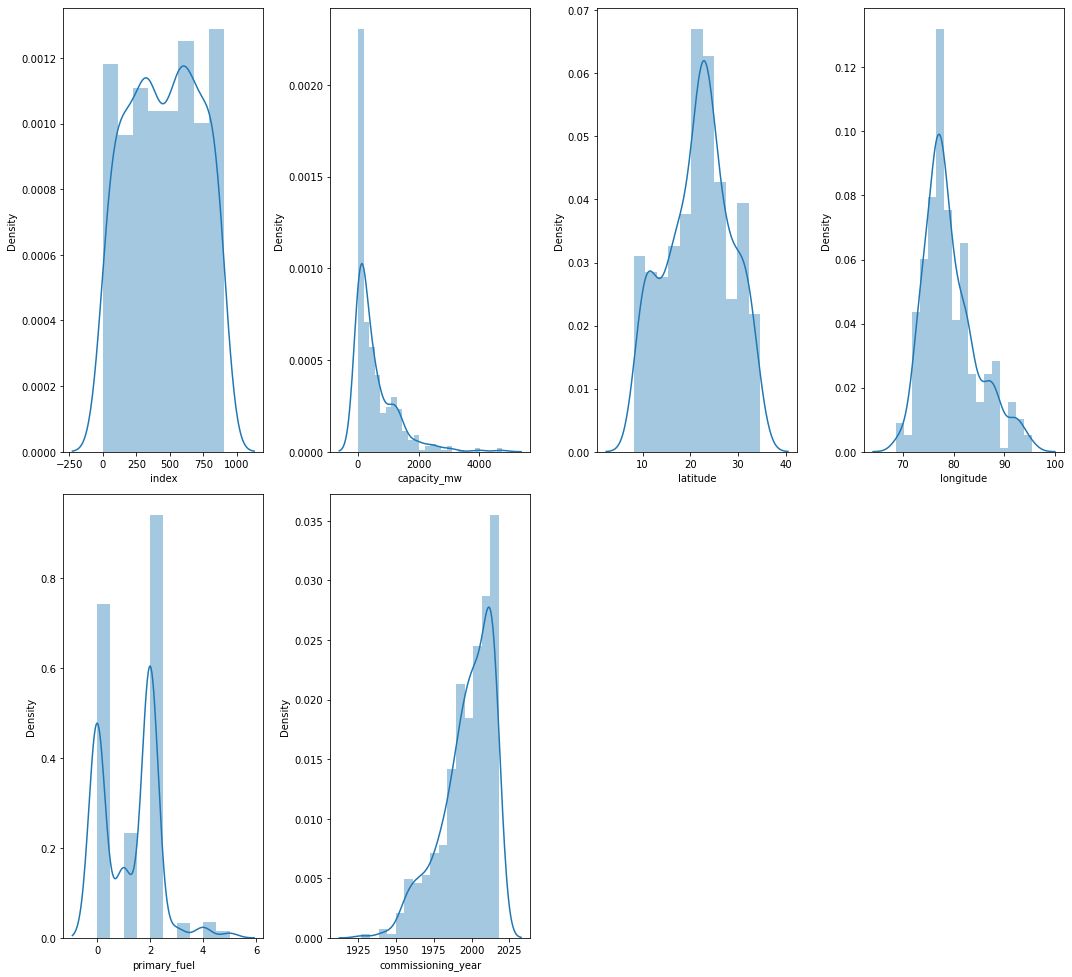

In [18]:
import warnings
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [19]:
# Preprocessing
# spliting dependent and independent variables on x and y axis before removing skewness
x = df.drop('capacity_mw',axis=1)
y = df['capacity_mw']

In [20]:
x

,index,latitude,longitude,primary_fuel,commissioning_year
0,0,28.1839,73.2407,5,2011.0
1,3,23.8712,91.3602,1,2004.0
2,4,21.9603,82.4091,0,2015.0
3,5,23.7689,68.6447,0,2005.0
4,6,10.4547,77.0078,2,1970.0
...,...,...,...,...,...
491,892,17.1401,73.8660,2,1998.0
492,893,30.3033,77.5684,2,1991.0
493,899,30.1081,77.3257,0,2007.0
494,901,13.1156,77.5838,4,1993.0


In [21]:
y

0         2.5
1       135.0
2      1800.0
3       250.0
4        60.0
        ...  
491      16.0
492      62.4
493     600.0
494     106.6
495    1600.0
Name: capacity_mw, Length: 496, dtype: float64

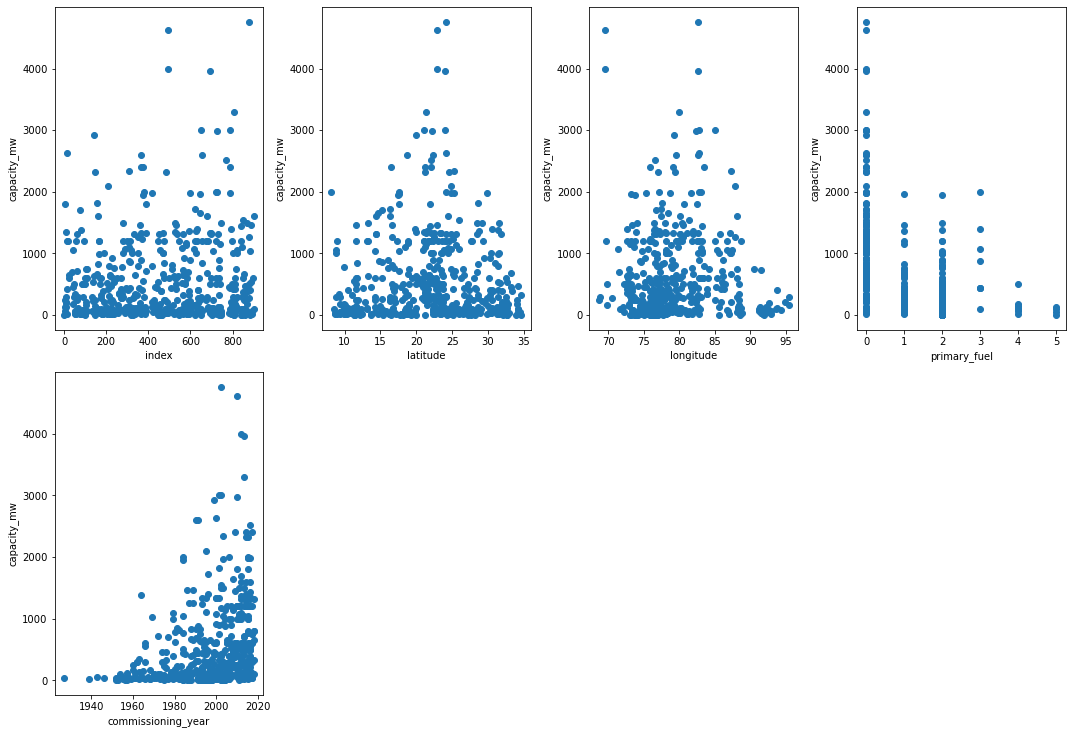

In [23]:
# making scatter plot of avg. rate vs other independent variables in dataset for observations
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=10:
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('capacity_mw',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [26]:
# use linear regression to make model for avg. price prediction
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=60)
y_train.head()

186     120.0
177     291.0
380    1330.0
419     460.0
112     225.0
Name: capacity_mw, dtype: float64

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y2_test,y_pred2)

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual capacity')
plt.ylabel('Predicted capacity')
plt.title('Capacity_mw Actual vs Prediction')
plt.show()

In [ ]:
import pickle
filename= 'powerplant_capacity_model.pickle'
pickle.dump(l_reg,open(filename,'wb'))